# Popularity Metric Analysis for 2017-2018 Timeframe

In [1]:
import json
import pandas as pd
import numpy as np
import math
import datetime

## Reading the Data

In [2]:
restaurants_df = pd.read_csv("./../datasets/2017-2018_restaurants.csv")

In [3]:
restaurants_df.head()

,business_id,city,state,latitude,longitude,is_open,attributes,categories,hours,checkin_count,review_count,raw_stars,stars,tip_count,first_date,last_date,visit_count,is_open_year_after
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",79,49,3.714286,3.5,4,2017-09-09 04:42:34,2021-01-22 05:20:38,132,True
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",181,24,3.500000,3.5,4,2010-03-09 16:02:04,2021-01-21 17:55:35,209,True
2,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",42,28,3.678571,3.5,3,2010-09-26 04:03:35,2021-01-23 01:43:50,73,True
3,ufCxltuh56FF4-ZFZ6cVhg,Orlando,FL,28.513265,-81.374707,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",42,38,4.631579,4.5,5,2012-08-19 21:08:57,2020-12-29 16:25:19,85,True
4,dmbbf3AqeG61_QHRZi1M1w,Pine Castle,FL,28.450303,-81.380587,1,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Automotive, American (Traditional), Gas Statio...",NaN,4,3,3.000000,3.0,1,2015-06-11 16:44:12,2020-11-14 00:49:04,8,True


In [4]:
restaurants_df["raw_stars"].isna().sum()

131

In [5]:
restaurants_df = restaurants_df[restaurants_df["review_count"] > 0]

In [6]:
def get_last_date_year(row):
    date = row[15]
    last_date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return last_date.year

In [7]:
restaurants_df["last_date_year"] = restaurants_df.apply(get_last_date_year, axis=1)

In [8]:
restaurants_df["checkins_tips_count"] = restaurants_df["tip_count"] + restaurants_df["checkin_count"]

In [9]:
restaurants_df.head(2)

,business_id,city,state,latitude,longitude,is_open,attributes,categories,hours,checkin_count,review_count,raw_stars,stars,tip_count,first_date,last_date,visit_count,is_open_year_after,last_date_year,checkins_tips_count
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",79,49,3.714286,3.5,4,2017-09-09 04:42:34,2021-01-22 05:20:38,132,True,2021,83
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",181,24,3.500000,3.5,4,2010-03-09 16:02:04,2021-01-21 17:55:35,209,True,2021,185


In [10]:
len(restaurants_df[restaurants_df["last_date_year"] < 2019])

2428

In [11]:
restaurants_df = restaurants_df[restaurants_df["last_date_year"] > 2018]

## Analyzing Data

### Looking at Restaurants

In [12]:
len(restaurants_df)

27535

In [13]:
avg_review_count = round(restaurants_df["review_count"].mean())
avg_checkins_count = round(restaurants_df["checkin_count"].mean())
avg_tips_count = round(restaurants_df["tip_count"].mean())
print(f"Restaurants have on {avg_review_count} reviews, {avg_checkins_count} checkins and {avg_tips_count} tips on average")

Restaurants have on 46 reviews, 83 checkins and 5 tips on average


In [14]:
v = len(restaurants_df[restaurants_df["checkin_count"] < 5])
print(f"There are {v} restaurants with 5 checkins or less")

There are 2800 restaurants with 5 checkins or less


In [15]:
average_star_rating = round(restaurants_df["raw_stars"].mean(), 2)
print(f"Restaurants star rating is {average_star_rating}/5 average")

Restaurants star rating is 3.53/5 average


In [16]:
restaurants_df['stars'].value_counts()

4.0    7333
3.5    5883
4.5    4597
3.0    3750
2.5    2225
2.0    1376
5.0    1155
1.5     767
1.0     449
Name: stars, dtype: int64

In [17]:
restaurants_df[['checkin_count', 'tip_count', 'review_count']].corr()

,checkin_count,tip_count,review_count
checkin_count,1.000000,0.780546,0.800733
tip_count,0.780546,1.000000,0.888132
review_count,0.800733,0.888132,1.000000


In [18]:
later_closed = restaurants_df[restaurants_df["is_open"] == 0]

print(f"There were {len(restaurants_df)} restaurants open in 2017-2018 of which {len(later_closed)} have since closed down")

There were 27535 restaurants open in 2017-2018 of which 3215 have since closed down


In [19]:
restaurants_df["visit_count"].mean()

134.42120936989286

In [20]:
restaurants_df["visit_count"].min()

1

In [21]:
restaurants_df["visit_count"].max()

6615

In [22]:
restaurants_df["visit_count"].std()

238.60634444319814

In [23]:
len(restaurants_df[restaurants_df['visit_count'] > 1000])

293

In [24]:
print("25% quantile total is " + str(restaurants_df['visit_count'].quantile(0.25)))
print("33% quantile total is " + str(restaurants_df['visit_count'].quantile(0.33)))
print("50% quantile total is " + str(restaurants_df['visit_count'].quantile(0.5)))
print("66% quantile total is " + str(restaurants_df['visit_count'].quantile(0.66)))
print("75% quantile total is " + str(restaurants_df['visit_count'].quantile(0.75)))

25% quantile total is 27.0
33% quantile total is 36.0
50% quantile total is 64.0
66% quantile total is 108.0
75% quantile total is 149.0


In [25]:
print("25% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.25)))
print("33% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.33)))
print("50% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.5)))
print("66% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.66)))
print("75% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.75)))

25% quantile total is 14.0
33% quantile total is 20.0
50% quantile total is 38.0
66% quantile total is 67.0
75% quantile total is 94.0


#### Correlations

In [26]:
restaurants_df[['visit_count', 'raw_stars']].corr()

,visit_count,raw_stars
visit_count,1.000000,0.192263
raw_stars,0.192263,1.000000


In [27]:
restaurants_df[['visit_count', 'is_open']].corr()

,visit_count,is_open
visit_count,1.000000,0.007763
is_open,0.007763,1.000000


In [28]:
restaurants_df[['checkins_tips_count', 'is_open']].corr()

,checkins_tips_count,is_open
checkins_tips_count,1.000000,0.011193
is_open,0.011193,1.000000


### Looking at the restaurants who later closed down

In [29]:
open_restaurants_in_2019_df = restaurants_df[restaurants_df["is_open"] == 1]

In [30]:
open_restaurants_in_2019_df["visit_count"].mean()

135.0946957236842

In [31]:
closed_restaurants_in_2019_df = restaurants_df[restaurants_df["is_open"] == 0]

In [32]:
len(closed_restaurants_in_2019_df)

3215

In [33]:
closed_restaurants_in_2019_df["visit_count"].mean()

129.32659409020218

In [34]:
# Only consider those who closed in 2019 (i.e. last activity is in 2019) because would reflect on the popularity
# of the restaurant in the previous years (2017-18)
closed_restaurants_in_2019_df = closed_restaurants_in_2019_df[closed_restaurants_in_2019_df["last_date_year"] == 2019]

In [35]:
len(closed_restaurants_in_2019_df)

1573

In [36]:
closed_restaurants_in_2019_df["visit_count"].mean()

91.41830896376351

### Looking at % of Restaurants who closed down based on visit count

In [37]:
bottom_df = restaurants_df.loc[restaurants_df["visit_count"] <= 36.0]

In [38]:
len(bottom_df)/len(restaurants_df)

0.330996913019793

In [39]:
middle_df = restaurants_df.loc[restaurants_df["visit_count"] > 36.0]
middle_df = middle_df.loc[middle_df["visit_count"] <= 108.0]

In [40]:
len(middle_df)/len(restaurants_df)

0.33092427819139275

In [41]:
top_df = restaurants_df.loc[restaurants_df["visit_count"] > 108.0]

In [42]:
len(top_df)/len(restaurants_df)

0.33807880878881424

In [43]:
(len(bottom_df) + len(middle_df) + len(top_df))/len(restaurants_df)

1.0

In [44]:
total_closed = len(closed_restaurants_in_2019_df)
print(total_closed)

1573


In [45]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2019)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2019)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2019)]

In [46]:
bottom_pct = round(len(bottom_closed_df) / total_closed * 100, 2)
middle_pct = round(len(middle_closed_df) / total_closed * 100, 2)
top_pct = round(len(top_closed_df) / total_closed * 100, 2)

print(f"{bottom_pct}% of closed restaurants are in the bottom 33% quartile")
print(f"{middle_pct}% of closed restaurants are in the middle 33% quartile")
print(f"{top_pct}% of closed restaurants are in the top 33% quartile")

34.46% of closed restaurants are in the bottom 33% quartile
38.65% of closed restaurants are in the middle 33% quartile
26.89% of closed restaurants are in the top 33% quartile


In [47]:
first_df = restaurants_df.loc[restaurants_df["visit_count"] <= 60]
second_df = restaurants_df.loc[restaurants_df["visit_count"] > 60]

In [48]:
first_closed_df = first_df[(first_df["is_open"] == 0) & (first_df["last_date_year"] == 2019)]
second_closed_df = second_df[(second_df["is_open"] == 0) & (second_df["last_date_year"] == 2019)]

In [49]:
print(f"{round(len(first_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the bottom 50% quartile")
print(f"{round(len(second_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the top 50% quartile")

52.51% of closed restaurants are in the bottom 50% quartile
47.49% of closed restaurants are in the top 50% quartile


In [50]:
bm = bottom_df["raw_stars"].mean()
mm = middle_df["raw_stars"].mean()
tm = top_df["raw_stars"].mean()
print(bm, mm, tm)

3.247883375693263 3.5266485232205254 3.8223095151296227


In [95]:
bottom_quartile_df = restaurants_df.loc[restaurants_df["visit_count"] <= 20]
top_quartile_df = restaurants_df.loc[restaurants_df["visit_count"] >= 250]

In [96]:
bottom_quartile_closed_df = bottom_quartile_df[(bottom_quartile_df["is_open"] == 0) & (bottom_quartile_df["last_date_year"] == 2019)]
top_quartile_closed_df = top_quartile_df[(top_quartile_df["is_open"] == 0) & (top_quartile_df["last_date_year"] == 2019)]

In [97]:
bottom_pct = round(len(bottom_quartile_closed_df) / len(bottom_quartile_df), 3)
top_pct = round(len(top_quartile_closed_df) / len(top_quartile_df), 3)

print(f"{bottom_pct}% of very unpopular restaurants closed in 2019")
print(f"{top_pct}% of very popular restaurants closed in 2019")

0.057% of very unpopular restaurants closed in 2019
0.028% of very popular restaurants closed in 2019


### Looking at % of Restaurants who closed down based on tips and checkins count

In [51]:
bottom_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] <= 20.0]
middle_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] > 20.0]
middle_df = middle_df.loc[middle_df["checkins_tips_count"] <= 67]
top_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] > 67]

In [52]:
(len(bottom_df) + len(middle_df) + len(top_df))/len(restaurants_df)

1.0

In [53]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2019)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2019)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2019)]

In [54]:
bottom_pct = round(len(bottom_closed_df) / total_closed * 100, 2)
middle_pct = round(len(middle_closed_df) / total_closed * 100, 2)
top_pct = round(len(top_closed_df) / total_closed * 100, 2)

print(f"{bottom_pct}% of closed restaurants are in the bottom 33% quartile")
print(f"{middle_pct}% of closed restaurants are in the middle 33% quartile")
print(f"{top_pct}% of closed restaurants are in the top 33% quartile")

37.64% of closed restaurants are in the bottom 33% quartile
36.68% of closed restaurants are in the middle 33% quartile
25.68% of closed restaurants are in the top 33% quartile


In [55]:
first_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] <= 35]
second_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] > 35]

first_closed_df = first_df[(first_df["is_open"] == 0) & (first_df["last_date_year"] == 2019)]
second_closed_df = second_df[(second_df["is_open"] == 0) & (second_df["last_date_year"] == 2019)]

In [56]:
print(f"{round(len(first_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the bottom 50% quartile")
print(f"{round(len(second_closed_df) / total_closed * 100, 2)}% of closed restaurants are in the top 50% quartile")

55.12% of closed restaurants are in the bottom 50% quartile
44.88% of closed restaurants are in the top 50% quartile


### Looking at % of Restaurants who closed down based star rating

In [57]:
print("25% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.25)))
print("33% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.33)))
print("50% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.5)))
print("66% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.66)))
print("75% quantile total is " + str(restaurants_df['raw_stars'].quantile(0.75)))

25% quantile total is 3.0186243936243935
33% quantile total is 3.2978723404255317
50% quantile total is 3.692307692307693
66% quantile total is 4.0
75% quantile total is 4.166666666666667


In [58]:
bottom_df = restaurants_df.loc[restaurants_df["raw_stars"] <= 3.30]
middle_df = restaurants_df.loc[restaurants_df["raw_stars"] > 3.30]
middle_df = middle_df.loc[middle_df["raw_stars"] <= 4.0]
top_df = restaurants_df.loc[restaurants_df["raw_stars"] > 4.0]

In [59]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2019)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2019)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2019)]

In [60]:
bottom_pct = round(len(bottom_closed_df) / total_closed, 2)*100
middle_pct = round(len(middle_closed_df) / total_closed, 2)*100
top_pct = round(len(top_closed_df) / total_closed *100, 2)

print(f"{bottom_pct}% of closed restaurants are in the bottom 33% quartile")
print(f"{middle_pct}% of closed restaurants are in the middle 33% quartile")
print(f"{top_pct}% of closed restaurants are in the top 33% quartile")

36.0% of closed restaurants are in the bottom 33% quartile
36.0% of closed restaurants are in the middle 33% quartile
28.86% of closed restaurants are in the top 33% quartile


In [61]:
first_df = restaurants_df.loc[restaurants_df["raw_stars"] <= 3.7]
second_df = restaurants_df.loc[restaurants_df["raw_stars"] > 3.7]

first_closed_df = first_df[(first_df["is_open"] == 0) & (first_df["last_date_year"] == 2019)]
second_closed_df = second_df[(second_df["is_open"] == 0) & (second_df["last_date_year"] == 2019)]

In [62]:
print(f"{round(len(first_closed_df) / total_closed, 2)*100}% of closed restaurants are in the bottom 50% quartile")
print(f"{round(len(second_closed_df) / total_closed, 2)*100}% of closed restaurants are in the top 50% quartile")

53.0% of closed restaurants are in the bottom 50% quartile
47.0% of closed restaurants are in the top 50% quartile


### Looking at star rating of unpopular businesses

In [63]:
restaurants_df.plot(x='visit_count', y='raw_stars', style='o')

### K-Means Clustering

In [64]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [65]:
X_df = restaurants_df.copy()[["checkins_tips_count", "raw_stars"]]
X_df["raw_stars"] = X_df["raw_stars"].apply(lambda x: x*100)

In [66]:
X = X_df.to_numpy()

In [67]:
X

array([[ 83.        , 371.42857143],
       [185.        , 350.        ],
       [ 45.        , 367.85714286],
       ...,
       [518.        , 450.19011407],
       [134.        , 302.40963855],
       [115.        , 298.11320755]])

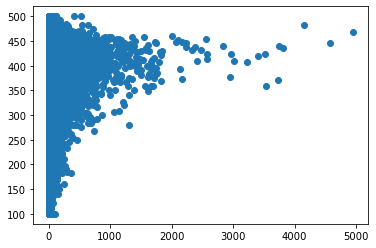

In [68]:
plt.scatter(X[:,0], X[:,1])

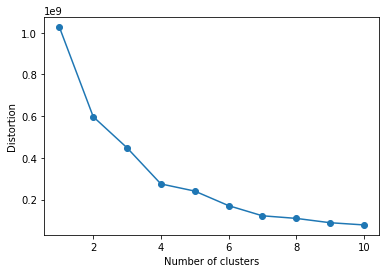

In [69]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [70]:
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=30, max_iter=1000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

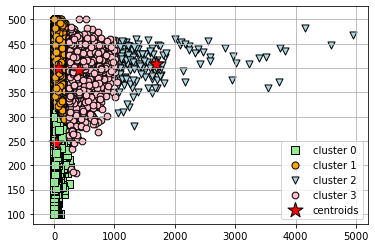

In [71]:
# plot the 4 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 0'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='pink',
    marker='8', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [72]:
y_km

array([1, 1, 1, ..., 3, 0, 0])

In [73]:
len(y_km)

27535

In [74]:
unique, counts = np.unique(list(y_km), return_counts=True)
dict(zip(unique, counts))

{0: 8189, 1: 17147, 2: 139, 3: 2060}

In [75]:
def get_label(nb):
    if nb == 0:
        return 0
    if nb == 1:
        return 1
    if nb == 2:
        return 2
    if nb == 3:
        return 2


labels = [get_label(nb) for nb in list(y_km)]

In [76]:
restaurants_df['k'] = labels

In [77]:
restaurants_df.head()

,business_id,city,state,latitude,longitude,is_open,attributes,categories,hours,checkin_count,...,raw_stars,stars,tip_count,first_date,last_date,visit_count,is_open_year_after,last_date_year,checkins_tips_count,k
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",79,...,3.714286,3.5,4,2017-09-09 04:42:34,2021-01-22 05:20:38,132,True,2021,83,1
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",181,...,3.500000,3.5,4,2010-03-09 16:02:04,2021-01-21 17:55:35,209,True,2021,185,1
2,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",42,...,3.678571,3.5,3,2010-09-26 04:03:35,2021-01-23 01:43:50,73,True,2021,45,1
3,ufCxltuh56FF4-ZFZ6cVhg,Orlando,FL,28.513265,-81.374707,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",42,...,4.631579,4.5,5,2012-08-19 21:08:57,2020-12-29 16:25:19,85,True,2020,47,1
4,dmbbf3AqeG61_QHRZi1M1w,Pine Castle,FL,28.450303,-81.380587,1,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Automotive, American (Traditional), Gas Statio...",NaN,4,...,3.000000,3.0,1,2015-06-11 16:44:12,2020-11-14 00:49:04,8,True,2020,5,0


In [78]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 8189, 1: 17147, 2: 2199}

In [79]:
restaurants_df[["visit_count", "k"]].corr()

,visit_count,k
visit_count,1.000000,0.513201
k,0.513201,1.000000


### Trying to validate the cluster classification

In [80]:
bottom_df = restaurants_df.loc[restaurants_df["k"] == 0]
middle_df = restaurants_df.loc[restaurants_df["k"] == 1]
top_df = restaurants_df.loc[restaurants_df["k"] == 2]

In [101]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2019)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2019)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2019)]

In [102]:
bottom_pct = round(len(bottom_closed_df) / len(bottom_df), 2)
middle_pct = round(len(middle_closed_df) / len(middle_df), 2)
top_pct = round(len(top_closed_df) / len(top_df), 2)

print(f"{bottom_pct}% of unpopular restaurants closed in 2019")
print(f"{middle_pct}% of neutral restaurants closed in 2019")
print(f"{top_pct}% of popular restaurants closed in 2019")

0.06% of unpopular restaurants closed in 2019
0.06% of neutral restaurants closed in 2019
0.02% of popular restaurants closed in 2019


In [104]:
def get_closed_ratio(df):
    closed = df[df["is_open"] == 0]
    print(f"{round(len(closed) / len(df)*100, 2)}%")
    
    random_df = restaurants_df.sample(n=len(df))
    random_closed = random_df[random_df["is_open"] == 0]
    print(f"random: {round(len(random_closed) / len(random_df)*100, 2)}%")

def get_ratio_for_metric(metric):
    if metric[:3] == "log":
        restaurants_df[metric] = get_log_metric(restaurants_df[metric[4:]])
    bottom = restaurants_df[metric].describe()["25%"]
    median = restaurants_df[metric].describe()["50%"]
    top = restaurants_df[metric].describe()["75%"]

    restaurants_df["popularity"] = restaurants_df[metric].apply(classify_popular(top, median, bottom))

    for i in range(3):
        print(i, end=" ")
        get_closed_ratio(restaurants_df[restaurants_df["k"] == i])

In [106]:
get_closed_ratio(bottom_df)
get_closed_ratio(middle_df)
get_closed_ratio(top_df)

11.44%
random: 11.34%
12.0%
random: 11.55%
10.0%
random: 11.51%
